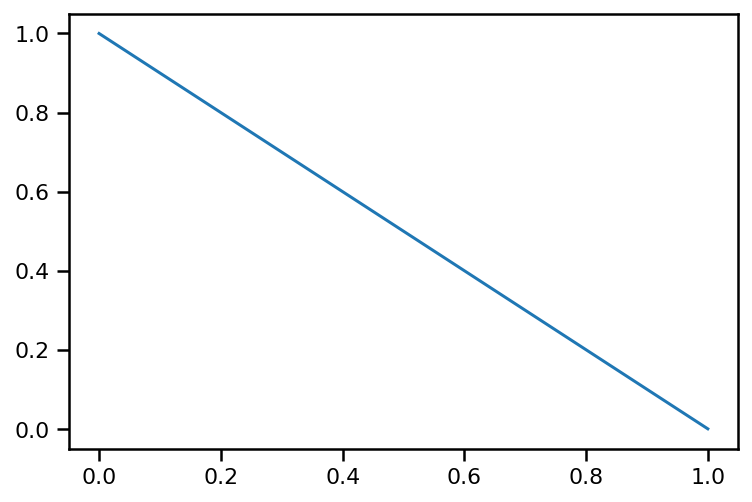

In [1]:
#%%capture
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.optimisation.optimization_management import test_all_objective_test
import numpy as np
from IPython.display import display#, HTML
from neuronunit.plottools import plot_score_history1
from neuronunit.optimisation.optimization_management import check_binary_match, three_step_protocol, TSD
import pandas as pd
from collections import OrderedDict
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import pickle
from dask.distributed import Client
#import dask
#dask.config.set(scheduler='threads')
#client = Client()
#client.get_versions(check=True)

#fps = list(MODEL_PARAMS["NEURONHH"].keys()) #
#3model_type="NEURONHH"
#sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)

# Simulated Data 
and select model parameters that are free to vary

In [2]:
fps = list(MODEL_PARAMS["IZHI"].keys()) #
model_type="IZHI"
sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)

Random simulated data tests made


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Below not effective, because not optimizing with std and NU scores atm

In [3]:
#with open('simulated_tests.p','wb') as f:
#    pickle.dump(sim_tests,f)
'''
       
import quantities as qt    
for k,v in sim_tests.items():
    #print(v.observation['mean'])
    if hasattr(v.observation['mean'],'units'):
        v.observation['std'] = 0.5 * np.abs(float(v.observation['mean']))*v.observation['mean'].units
    else:
        if type(v.observation['mean']) is type(str()):
            print(k)
        else:
            if hasattr(v.observation['mean'],'units'):
    
                v.observation['std'] = 0.20 * np.abs(float(v.observation['mean']))*v.observation['mean'].units
            else:
                v.observation['std'] = 0.20 * np.abs(float(v.observation['mean']))#*qt.unitless
'''             #sim_tests.pop('isi_type_first',None)
#sim_tests.pop('isi_type_last',None)
#sim_tests.pop('isi_type_half',None)

new_sim_tests = {k:v for k,v in sim_tests.items() if type(v) is not type(str())}
#sim_tests = {k:v for k,v in sim_tests.items() if hasattr(v,'allen') }

sim_tests = TSD(new_sim_tests)


In [4]:
#print(dir(v))

In [5]:
from neuronunit.optimisation.data_transport_container import DataTC
dtc = DataTC(backend="IZHI")
model = dtc.dtc_to_model()
dtc1 = model.model_to_dtc()
dtc1.backend

In [6]:

#target = feature_mine(target)
"""
cleaned0 = [value[1]['mean'] for value in target.preds.items() if hasattr(value[1],'keys')]
cleaned1 = [value for value in target.preds.items() if not hasattr(value[1],'keys')]
cleaned1
target.preds
cleaned1
"""

"\ncleaned0 = [value[1]['mean'] for value in target.preds.items() if hasattr(value[1],'keys')]\ncleaned1 = [value for value in target.preds.items() if not hasattr(value[1],'keys')]\ncleaned1\ntarget.preds\ncleaned1\n"

In [7]:
"""
from neuronunit.tests.base import FakeTest, VmTest
allen_tests = []
for key,value in target.preds.items():
    allen_tests.append(VmTest(observation=value,name = key))
    
    
for t in allen_tests:
    print(t.observation,t.name)
"""    

'\nfrom neuronunit.tests.base import FakeTest, VmTest\nallen_tests = []\nfor key,value in target.preds.items():\n    allen_tests.append(VmTest(observation=value,name = key))\n    \n    \nfor t in allen_tests:\n    print(t.observation,t.name)\n'

In [8]:
display(pd.DataFrame([target.preds]))


,adapt,latency,isi_cv,mean_isi,median_isi,first_isi,avg_rate,threshold_index_first,clipped_first,threshold_t_first,...,fast_trough_v_half,adp_index_half,adp_t_half,adp_v_half,slow_trough_index_half,slow_trough_t_half,slow_trough_v_half,width_half,upstroke_downstroke_ratio_half,spikes
0,0.037463,0.12201,0.165307,0.088825,0.09337,0.0424,9.23084,12201,False,0.12201,...,-66489.576492,63742.0,0.63742,-66982.582323,65594.0,0.65594,-70636.476089,0.00121,0.067552,12


# Meta Parameters








# How Good is the mean of Random Search?

In [9]:
#OM = target.dtc_to_opt_man()
#rand_sample = OM.random_sample(target,100)
#display(rand_sample['frame'])
'''

'''
#sim_tests
#1==2


'\n\n'

In [ ]:


MU = 20
NGEN = 20
if __name__ == '__main__':
    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps)

#

10


In [ ]:
plt = plot_score_history1(results)

In [ ]:
for t in results['pop'][0].dtc.tests:
    try:
        print(t.observation['mean']-t.prediction['mean'])
    except:
        print(t.observation['value']-t.prediction['value'])
        
target.rheobase

In [ ]:
for f in results['pop'][0].fitness.values: print((f))

In [ ]:
results['pop'][0].dtc.tests = results['pop'][0].dtc.tests[0:8]
results['pop'][0].dtc.get_agreement()
results['pop'][0].dtc.agreement

In [ ]:
results['pop'][0].dtc.SA

In [ ]:
#results['history'].genealogy_history[200].fitness
#results['history'].genealogy_history[200].dtc.vm30

for t in results['pop'][0].dtc.tests:
    print(t.name,np.abs(t.observation['mean'])/t.observation['std'])
    print(t.name,t.observation['mean'],t.observation['std'])

In [ ]:


def tighten_bellcurve(tests):
    for k,v in tests.items():
        print(k,v.observation)
        v.observation['std'] = 0.5* v.observation['std']
    return tests
#sim_tests = tighten_bellcurve(sim_tests)
ELEPHANT = False
if ELEPHANT:
    objectives = {k:v for k,v in results['pf'][0].dtc.SA.items() }
    logbook = results['log']
    scores = [ m['max'] for m in logbook ]
    list_of_dicts = []
    df1 = pd.DataFrame()
    for i,(k,v) in enumerate(objectives.items()):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
if not ELEPHANT:
    objectives = [ t.name for t in results['pf'][0].dtc.tests ]
    logbook = results['log']
    scores = [ m['max'] for m in logbook ]
    list_of_dicts = []
    df1 = pd.DataFrame()
    for i,k in enumerate(objectives[0:10]):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
    
    plt.show()
    
    df1 = pd.DataFrame()

    for i,k in enumerate(objectives[-11:-1]):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

    plt.show()


In [ ]:
ELEPHANT = True

In [ ]:
if ELEPHANT:
    objectives = {k:v for k,v in results['pf'][0].dtc.SA.items() }
    logbook = results['log']
    scores = [ m['max'] for m in logbook ]
    list_of_dicts = []
    df1 = pd.DataFrame()
    for i,(k,v) in enumerate(objectives.items()):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

# There is a block of five error types that seem highly correlated with each other

In [ ]:
pop = list(results['history'].genealogy_history.values())
get_min = [(np.sum(j.fitness.values),i) for i,j in enumerate(pop)]
min_gene = sorted(get_min,key = lambda x: x[0])
min_gene = results['history'].genealogy_history[min_gene[0][1]]
min_gene.fitness.values

In [ ]:
from neuronunit.optimisation.optimization_management import dtc_to_rheo
def local_hof(results,dtc):
    pop = list(results['history'].genealogy_history.values())
    get_min = [(np.sum(j.fitness.values),i) for i,j in enumerate(pop)]
    min_gene = sorted(get_min,key = lambda x: x[0])
    min_gene = results['history'].genealogy_history[min_gene[0][1]]
    OM = dtc.dtc_to_opt_man()
    dtc.attrs.pop("Iext",None)
    dtc.attrs.pop("dt",None)
    frozen = OrderedDict(dtc.attrs)
    for i,(k,v) in enumerate(frozen.items()):
        dtc.attrs[k] = min_gene[i]
    dtc = dtc_to_rheo(dtc)
    dtc = OM.format_test(dtc)
    dtc.self_evaluate()
    return dtc
dtc = results['pf'][0].dtc

opt = local_hof(results,dtc)
print(opt.SA)
opt.rheobase
#d#tg = dtc_to_rheo(opt)
#dtg.rheobase
#print(dtg.rheobase)
#dtg.attrs



In [ ]:
opt.attrs.pop("Iext",None)
opt.attrs.pop("dt",None)

In [ ]:
#from collections import OrderedDict
#opt = results['pop'][0].dtc
#frozen = OrderedDict(opt.attrs)
#print(frozen)
opt = results['pop'][0].dtc
print(target.rheobase, opt.rheobase)
opt.SA


In [ ]:
import copy
backup_tests = copy.copy(opt.tests)
opt.tests = opt.tests[0:8]

opt.self_evaluate()
opt.get_agreement()
opt.agreement


In [ ]:
#opt = results['pf'][0].dtc
opt.self_evaluate()
opt.get_agreement()
check_binary_match(opt,target,snippets=True)
target = OM.format_test(target)
results.keys()


In [ ]:
for t in opt.tests:
    #print(t.observation,t.prediction)
    try:
        print(np.abs(t.observation['mean']-t.prediction['mean']))
    except:
        pass
       # print(np.abs(t.observation['value']-t.prediction['value']))

        
opt.rheobase


In [ ]:
def check_bin_vm15(target,opt):
    plt.plot(target.vm15.times,target.vm15.magnitude)
    plt.plot(opt.vm15.times,opt.vm15.magnitude)
    plt.show()

In [ ]:

def basic_expVar(trace1, trace2):
    '''This is the fundamental calculation that is used in all different types of explained variation.  
    At a basic level, the explained variance is calculated between two traces.  These traces can be PSTH's
    or single spike trains that have been convolved with a kernel (in this case always a Gaussian)
    Input:
        trace 1 & 2:  1D numpy array containing values of the trace.  (This function requires numpy array
                        to ensure that this is not a multidemensional list.)
    Returns:
        expVar:  float value of explained variance
    '''
   
    var_trace1=np.var(trace1)
    var_trace2=np.var(trace2)
    var_trace1_minus_trace2=np.var(trace1-trace2)

    if var_trace1_minus_trace2 == 0.0:
        return 1.0
    else:
        return (var_trace1+var_trace2-var_trace1_minus_trace2)/(var_trace1+var_trace2)
    
print(basic_expVar(opt.vm15.magnitude, target.vm15.magnitude))    

In [ ]:


opt = results['pop'][0].dtc
check_binary_match(opt,target,snippets=True)

In [ ]:
check_binary_match(opt,target,snippets=False)

In [ ]:
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model
inject_and_plot_passive_model(opt,second=target,figname=None,plotly=False)




In [ ]:
opt.agreement
check_bin_vm15(target,opt)


In [ ]:
plt.clf()
plt.plot(target.vm15.times,target.vm15.magnitude)
plt.show()


In [ ]:
plt.clf()
plt.plot(opt.vm15.times,opt.vm15.magnitude)
plt.show()

In [ ]:
opt.SA


In [ ]:
#target.tests.keys()
target.tests[-1].prediction

In [ ]:
opt.tests[-1].prediction

# Get crowding distance on two solutions

# Hall of fame and pareto front are not working properly. 
I think it is because the individual they were expecting is different to what they are getting.
# TODO re-align with BluePyOpt algorithm and optimisation

In [ ]:
results['min_gene'].SA
#results['min_gene'].get_agreement()
#results['min_gene'].agreement

In [ ]:
results['pop'][0].dtc.SA
results['pop'][0].dtc.get_agreement()
results['pop'][0].dtc.agreement

In [ ]:
'''
results['hof'][0].dtc.SA
results['hof'][0].dtc.get_agreement()
results['hof'][0].dtc.agreement
'''
print(results['pop'][0].fitness)
results['pf'].update([results['pop'][0]])
results['pf'][0].fitness

results['hof'].update([results['pop'][0]])
results['hof'][0].fitness

In [ ]:
for t in target.tests.values():
    #print(t.prediction,t.name)
    print(t.observation['mean'],t.name)
    
for t in sim_tests.values():    
    print(t.observation['mean'],t.name)  
    print(t.prediction,t.name)


In [ ]:
def parition(sim_tests,model_type):
    results0 = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,free_parameters=['c','a','b'])

    plt = plot_score_history1(results0)

    results1 = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,free_parameters=
                                  ['k','C','d'],seed_pop=results0['pop'][0:10]\
                                  ,hc=['c','a','b'])

    plt = plot_score_history1(results1)
    results2 = sim_tests.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,\
            free_parameters=['vr','vPeak'],\
            seed_pop=results1['pop'][0:10],hc=['c','a','d','b','k','C'])
    plt = plot_score_history1(results2)


    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps,\
                seed_pop=results2['pop'][0:10])

    plt = plot_score_history1(results)
    return results
results = parition(sim_tests,model_type)

# Analyse Results

# Compare scores above to random scores below

In [ ]:
# This should be more succint than above.
agreement = opt.get_agreement().agreement
display(out['frame'])


In [ ]:
out['best_random_sum_total']

# Look at evolution History

In [ ]:
plt = plot_score_history1(results)
from neuronunit.optimisation.optimization_management import check_binary_match
plt.show()

In [ ]:
check_binary_match(opt,target,snippets=False)

In [ ]:
try:
    opt.attrs.pop('dt',None)
    opt.attrs.pop('Iext',None)
except:
    pass


In [ ]:
display(pd.DataFrame([opt.attrs]))
import copy
temp = {}
for k in opt.attrs.keys():
    temp[k] = target.attrs[k]
display(pd.DataFrame([temp]))

In [ ]:
display(pd.DataFrame([{k.name:v for k,v in opt.SA.items()}]))

What where the values of model parameters that where held constant?


In [ ]:
df0 = opt.dtc_to_model().default_attrs
df1 = target.dtc_to_model().default_attrs
hc = {}

try:
    df0.attrs.pop('dt',None)
    df0.attrs.pop('Iext',None)
    opt.attrs.pop('dt',None)
    opt.attrs.pop('Iext',None)

except:
    pass

for k,v in df0.items():
    if k not in opt.attrs.keys():
        assert df0[k] == df1[k]
        hc[k] = v        
display("Held constant:")
display(pd.DataFrame([hc]))        

If the Pareto Front encircles the best solution without sampling directly on top of it.
Does piercing the center get us closer to the hall of fame?
Below, plot HOF[0]/PF[0] are they the same model? 

In [ ]:
# check_binary_match(opt,hof,snippets=True)


# Exploring the neighbourhood of 
the Optimal solution is now syntatically easy

## Make ranges to explore:

In [ ]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
a_range = MODEL_PARAMS["RAW"]['a']
grid_a = np.linspace(a_range[0],a_range[1],25)




## Mutate a parameter in a dimension of interest.

In [ ]:
opt_sum0 = np.sum(opt.SA.values)
for_scatter0 = (opt.attrs['a'],opt_sum0)
from tqdm import tqdm
collect = []
mutant = copy.copy(opt)
for a in tqdm(grid_a):
    # non random mutation
    mutant.attrs['a'] = a
    # Evaluate NU test suite
    mutant.self_evaluate()
    # sum components (optional)
    fit = np.sum(mutant.SA.values)
    collect.append(fit)
plt.plot(grid_a,collect)
plt.scatter(for_scatter0[0],for_scatter0[1],label='optima')
    

The above plot seemed to have multiple steep wells of low error about the optima.

It might not be reasonable to expect to sample every such well, as the stochastic and non exhuastive sampling in the GA means it is not garunteed to sample small and and focused pockets of error change.

In [ ]:
b_range = MODEL_PARAMS["RAW"]['b']
grid_b = np.linspace(b_range[0],b_range[1],30);

In [ ]:
opt_sum = np.sum(opt.SA.values)
for_scatter1 = (opt.attrs['b'],opt_sum)
from tqdm import tqdm
collect = []
mutant = copy.copy(opt)
for b in tqdm(grid_b):
    # non random mutation
    mutant.attrs['b'] = b
    # Evaluate NU test suite
    mutant.self_evaluate()
    # sum components (optional)
    fit = np.sum(mutant.SA.values)
    collect.append(fit)
plt.plot(grid_b,collect)
plt.scatter(for_scatter1[0],for_scatter1[1],label='optima')


# Compare the match of passive waveforms

In [ ]:

#from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model
#inject_and_plot_passive_model(opt)
import quantities as pq
tm = target.dtc_to_model()

model = opt.dtc_to_model()
uc = {'amplitude':-10*pq.pA,'duration':500*pq.ms,'delay':100*pq.ms}
model.inject_square_current(uc)
vm1 = model.get_membrane_potential()
tm.inject_square_current(uc)
vm0 = tm.get_membrane_potential()
plt.plot(vm1.times, vm1.magnitude, c='b',label=str('opt ADEXP'))#+str(model.attrs['a']))
plt.plot(vm0.times, vm0.magnitude, c='r',label=str('target HH'))#+str(model.attrs['a']))

plt.show()